# 판다스 데이터분석
## CrossTab, Pivot_Table
판다스에서 crosstab과 pivot_table은 데이터를 재구성하고 요약하는 데 유용한 함수입니다.

* crosstab : 이 함수는 두 칼럼의 교차 빈도, 비율, 덧셈 등을 구할 때 사용합니다. 주로 범주형 데이터의 분류를 위해 사용되며, 간단히 말해서 두 칼럼에 대한 교차표를 생성해줍니다.

In [2]:
# crosstab: 원하는 행과 열을 설정해서 '빈도값'
# pivot_table: 원하는 행과 열을 설정해서 특정값의 '집계값'

import pandas as pd
import numpy as np

df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['X', 'Y', 'Z'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

df


,A,B,C,D,E
0,one,X,foo,-1.271118,-0.112188
1,one,Y,foo,0.064880,-1.232564
2,two,Z,foo,-0.291679,1.325320
3,three,X,bar,-0.925066,1.520934
4,one,Y,bar,0.121528,0.435584
5,one,Z,bar,-0.154617,0.957522
6,two,X,foo,0.338486,0.199636
7,three,Y,foo,0.219908,0.072679
8,one,Z,foo,-0.813008,1.007566
9,one,X,bar,0.667956,0.490959


* pivot_table : 이 함수는 복잡한 데이터 집계를 수행할 수 있습니다. 여러 개의 변수에 대한 요약 통계를 구할 때 유용하며, pivot_table의 장점은 'aggfunc' 파라미터를 통해 다양한 집계 함수를 적용할 수 있다는 것입니다. 'mean', 'sum', 'count' 등의 함수를 적용할 수 있습니다.

In [3]:
df.pivot_table(index='A', columns = 'C', values='D', aggfunc='mean')    #index: 행 위치에 들어갈 열 / columns: 열 위치에 들어갈 열 / values: 데이터로 사용할 열 

C,bar,foo
A,,
one,0.211622,-0.673082
three,-0.003920,0.219908
two,0.016162,0.023403


In [4]:
df.pivot_table(index=['A','B'], columns='C', values={"D":'max', 'E':'min'})

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   X  0.665650 -1.922142  1.070754  0.163055
      Y -1.314728  0.682287  0.444270  1.226436
      Z  0.059229 -0.792443 -0.707130 -1.005832
three X -0.562080       NaN -1.171907       NaN
      Y       NaN -0.852014       NaN -1.207789
      Z  0.300879       NaN  0.803050       NaN
two   X       NaN  0.133250       NaN -1.179690
      Y -0.801125       NaN -3.158646       NaN
      Z       NaN -0.455851       NaN  0.980571

### 연습문제
1. crosstab을 사용하여 'A'와 'B'의 교차 빈도를 구하세요.

In [4]:
pd.crosstab(index= df['A'], columns = df['B']) #행과 열이 모두 범주형 데이터 / margins = True: 값을 세 줌 / normalize= True : 비율 확인

B,X,Y,Z
A,,,
one,2,2,2
three,1,1,1
two,1,1,1


2. 동일한 데이터프레임에서 pivot_table을 사용하여 'A'를 인덱스로, 'C'를 칼럼으로, 'D'의 평균을 값으로 가지는 피벗 테이블을 만드세요.

In [5]:
df.pivot_table(index='A', columns = 'C', values='D', aggfunc='mean') 

C,bar,foo
A,,
one,0.211622,-0.673082
three,-0.003920,0.219908
two,0.016162,0.023403


3. pivot_table을 사용하여 'A'와 'B'를 인덱스로, 'D'와 'E'의 평균을 값으로 가지는 피벗 테이블을 만드세요.

In [6]:
df.pivot_table(index=['A','B'], values=['D','E'], aggfunc='mean')   

D         E
A     B                    
one   X -0.301581  0.189386
      Y  0.093204 -0.398490
      Z -0.483812  0.982544
three X -0.925066  1.520934
      Y  0.219908  0.072679
      Z  0.917227 -1.126783
two   X  0.338486  0.199636
      Y  0.016162 -0.041007
      Z -0.291679  1.325320

4. 동일한 데이터프레임에서 crosstab을 사용하여 'A'와 'B'의 교차 빈도를 구하되, 'C'가 'foo'인 행만 포함하여 계산하세요.

In [7]:
#1. df
#2. a = df[df['C] == 'foo]
#3. pd.crosstab(a['A'],)

In [8]:
a = df[df['C'] == 'foo']
pd.crosstab(index = a['A'], columns = a['B'])

B,X,Y,Z
A,,,
one,1,1,1
three,0,1,0
two,1,0,1


5. pivot_table을 사용하여 'B'를 인덱스로, 'C'를 칼럼으로, 'D'와 'E'의 합계를 값으로 가지는 피벗 테이블을 만드세요.

In [9]:
df.pivot_table(index='B', columns = 'C', values=['D','E'], aggfunc='sum')    

D                   E          
C       bar       foo       bar       foo
B                                        
X -0.257110 -0.932633  2.011893  0.087448
Y  0.137691  0.284789  0.394577 -1.159885
Z  0.762609 -1.104686 -0.169261  2.332886

6. crosstab을 사용하여 'A'와 'C'의 교차 빈도를 구하되, 각 셀에 백분율을 표시하세요.

In [10]:

pd.crosstab(index= df['A'] , columns = df['C'], normalize= True) 

C,bar,foo
A,,
one,0.250000,0.250000
three,0.166667,0.083333
two,0.083333,0.166667


7. pivot_table을 사용하여 'A'와 'B'를 인덱스로, 'C'를 칼럼으로, 'D'의 최대값과 'E'의 최소값을 값으로 가지는 피벗 테이블을 만드세요.

In [11]:
df.pivot_table(index=['A','B'], columns = 'C', values={'D':'max','E':'min'})  

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   X  0.667956 -1.271118  0.490959 -0.112188
      Y  0.121528  0.064880  0.435584 -1.232564
      Z -0.154617 -0.813008  0.957522  1.007566
three X -0.925066       NaN  1.520934       NaN
      Y       NaN  0.219908       NaN  0.072679
      Z  0.917227       NaN -1.126783       NaN
two   X       NaN  0.338486       NaN  0.199636
      Y  0.016162       NaN -0.041007       NaN
      Z       NaN -0.291679       NaN  1.325320

8. crosstab을 사용하여 'B'와 'C'의 교차 빈도를 구하되, 행과 열의 합계를 표시하세요.

In [12]:

pd.crosstab(index= df['B'], columns = df['C'],  margins = True) #행과 열이 모두 범주형 데이터 / margins = True: 값을 세 줌 / normalize= True : 비율 확인

C,bar,foo,All
B,,,
X,2,2,4
Y,2,2,4
Z,2,2,4
All,6,6,12


9. pivot_table을 사용하여 'A'와 'B'를 멀티 인덱스로, 'C'를 칼럼으로, 'D'와 'E'의 중앙값으로 가지는 피벗 테이블을 만드세요.

In [13]:
df.pivot_table(index=['A','B'], columns = 'C', values=['D','E'], aggfunc='median')  

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   X  0.667956 -1.271118  0.490959 -0.112188
      Y  0.121528  0.064880  0.435584 -1.232564
      Z -0.154617 -0.813008  0.957522  1.007566
three X -0.925066       NaN  1.520934       NaN
      Y       NaN  0.219908       NaN  0.072679
      Z  0.917227       NaN -1.126783       NaN
two   X       NaN  0.338486       NaN  0.199636
      Y  0.016162       NaN -0.041007       NaN
      Z       NaN -0.291679       NaN  1.325320

10. crosstab을 사용하여 'A', 'B', 'C'의 교차 빈도를 구하세요.

In [14]:

pd.crosstab(index=[df["A"], df['B']], columns= df['C'])

C        bar  foo
A     B          
one   X    1    1
      Y    1    1
      Z    1    1
three X    1    0
      Y    0    1
      Z    1    0
two   X    0    1
      Y    1    0
      Z    0    1

## 누락값 처리하기
판다스에서 누락값은 데이터에서 값이 존재하지 않는, 즉 "결측값"을 나타냅니다. 이는 대부분 NaN (Not a Number)으로 표시됩니다. 이러한 누락값은 데이터를 수집, 정리, 변환하는 과정에서 발생할 수 있으며, 이를 올바르게 처리하는 것은 데이터 분석의 중요한 단계입니다.

* 누락값 제거하기: dropna() 함수를 사용하여 누락값을 가진 행 또는 열을 제거할 수 있습니다. 행을 삭제할 때는 df.dropna(axis=0)을, 열을 삭제할 때는 df.dropna(axis=1)을 사용합니다. 하지만 이 방법은 주의가 필요합니다. 너무 많은 데이터를 삭제하면 데이터의 분포가 달라질 수 있기 때문입니다. 또는 subset 매개변수를 사용하여 특정 열에 NaN이 있는 행만 삭제할 수 있습니다.

In [15]:
import numpy as np

#누락값 및 데이터타입

df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5, 6, 7, 8, 9, 10, 5],
    'B': [np.nan, 2, 3, 4, 5, np.nan, 7, 8, 9, 10, 4],
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, np.nan, 3]
})

df.info()  #obeject

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       10 non-null     float64
 1   B       9 non-null      float64
 2   C       10 non-null     float64
dtypes: float64(3)
memory usage: 392.0 bytes


In [17]:
print(np.nan == 1)
print(np.nan == 0)
print(np.nan == True)
print(np.nan == False)
print(np.nan == np.nan)

False
False
False
False
False


In [19]:
pd.isnull(5)

False

In [20]:
df.isnull().sum()

A    1
B    2
C    1
dtype: int64

In [21]:
df.notnull().sum()

A    10
B     9
C    10
dtype: int64

In [22]:
df.dropna()  #axis = 0 :누락값 있는 행 삭제 / axis = 1: 누락값 있는 열 삭제

,A,B,C
1,2.0,2.0,2.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
10,5.0,4.0,3.0


In [23]:
df.dropna(subset=['B','C'])

,A,B,C
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
10,5.0,4.0,3.0


In [24]:
df.dropna(subset='C')  #C열에 있는 누락값만 삭제

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,NaN,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
10,5.0,4.0,3.0


* 누락값 채우기: fillna() 함수를 사용하여 누락값을 다른 값으로 채울 수 있습니다. 특정 값으로 채우는 것 뿐만 아니라, 이전 행 또는 다음 행의 값으로 채우는 방법(backward fill 또는 forward fill)도 있습니다. 예를 들어, df.fillna(0)은 누락값을 0으로 채우고, df.fillna(method='ffill')는 이전 행의 값으로 누락값을 채우며, df.fillna(method='bfill')는 다음 행의 값으로 누락값을 채웁니다. 또한 사전(dict) 형식의 입력도 받아서 다른 칼럼마다 다른 값을 채울 수 있습니다.

In [20]:
df.fillna(0) #일반값으로 채우기

,A,B,C
0,1.0,0.0,1.0
1,2.0,2.0,2.0
2,0.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,0.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,0.0


In [21]:
df.fillna(df.mean())  #각각의 열의 평균으로 채우기

,A,B,C
0,1.0,5.777778,1.0
1,2.0,2.000000,2.0
2,5.7,3.000000,3.0
3,4.0,4.000000,4.0
4,5.0,5.000000,5.0
5,6.0,5.777778,6.0
6,7.0,7.000000,7.0
7,8.0,8.000000,8.0
8,9.0,9.000000,9.0
9,10.0,10.000000,4.8


In [22]:
df.fillna(method='ffill')  #front fill

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,2.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,5.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,9.0


In [23]:
df.fillna(method='bfill')  #back fill

,A,B,C
0,1.0,2.0,1.0
1,2.0,2.0,2.0
2,4.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,7.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,3.0


In [25]:
df.fillna({'A':df['A'].mean(), 'B':df['B'].median(), 'C': 100})

,A,B,C
0,1.0,5.0,1.0
1,2.0,2.0,2.0
2,5.7,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,5.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,100.0


In [26]:
df.fillna({'A':0, 'B':10, 'C': 100})  #각각 열마다 다르게 채우고 싶을 경우 딕셔너리 사용

,A,B,C
0,1.0,10.0,1.0
1,2.0,2.0,2.0
2,0.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,10.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,100.0


* 누락값 대체하기: replace() 함수를 사용하여 누락값을 다른 값으로 대체할 수도 있습니다. 이는 특정 조건을 만족하는 값을 대체하는 데 특히 유용합니다. 또한 replace() 함수는 사전(dict) 형식의 입력도 받아서 다른 칼럼마다 다른 값을 채울 수 있습니다.

* 누락값 확인하기: isnull() 또는 notnull() 함수를 사용하여 데이터프레임에서 누락값이 어디에 있는지를 확인할 수 있습니다.

* 누락값을 가진 데이터의 연산: 판다스의 기본 동작은 누락값을 '전파'하는 것입니다. 즉, 누락값이 포함된 연산 결과는 항상 누락값이 됩니다.

* interpolate() 함수는 누락된 데이터 값을 보간(interpolation)을 통해 채워 넣는 역할을 합니다. 이 함수는 기본적으로 선형 보간 방법을 사용합니다. 즉, 누락된 값들을 해당 값의 이전 값과 다음 값 사이의 선형 방정식을 사용하여 계산합니다.

In [27]:
# 흐름에 맞게 누락값 채워주는 함수

a = [1, np.nan, np.nan, 10]
date = ['2023/12/01', '2023/12/02', '2023/12/08', '2023/12/10']
date = pd.to_datetime(date)

s = pd.Series(a, index = date)
s.interpolate(method='time')  #시간의 흐름에 맞게 채워라

2023-12-01     1.0
2023-12-02     2.0
2023-12-08     8.0
2023-12-10    10.0
dtype: float64

In [26]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# 머신러닝으로 채우는 방법
from sklearn.impute import KNNImputer

model = KNNImputer(n_neighbors=2) #가장 가까운데이터를 2개만 찾는다
df2 = model.fit_transform(df)

pd.DataFrame(df2, columns=['A','B','C'])


,A,B,C
0,1.0,2.5,1.0
1,2.0,2.0,2.0
2,3.5,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,6.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,8.5


In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer #선형 회귀 누락값(MICE)
model = IterativeImputer()
df2 = model.fit_transform(df)

pd.DataFrame(df2,columns=['A','B','C'])


,A,B,C
0,1.000000,1.000279,1.00000
1,2.000000,2.000000,2.00000
2,2.998888,3.000000,3.00000
3,4.000000,4.000000,4.00000
4,5.000000,5.000000,5.00000
5,6.000000,6.000027,6.00000
6,7.000000,7.000000,7.00000
7,8.000000,8.000000,8.00000
8,9.000000,9.000000,9.00000
9,10.000000,10.000000,10.00068


In [30]:
ebola = pd.read_csv("data/country_timeseries.csv")
ebola.isnull().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [30]:
# 시간의 흐름 = 행
ebola = pd.read_csv("data/country_timeseries.csv")
ebola['Date'] = pd.to_datetime(ebola['Date'])
ebola = ebola.set_index("Date")  #행 설정
ebola =ebola.sort_index()

ebola = ebola.interpolate(method='time')
ebola = ebola.fillna(method='ffill')
ebola = ebola.fillna(method='bfill')

ebola

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2014-03-22,0,49.0,8.0,6.000000,0.0,1.0,1.0,1.0,1.0,29.000000,6.0,5.000000,0.0,0.0,0.0,1.0,1.0
2014-03-24,2,86.0,8.0,6.000000,0.0,1.0,1.0,1.0,1.0,59.000000,6.0,5.000000,0.0,0.0,0.0,1.0,1.0
2014-03-25,3,86.0,8.0,6.000000,0.0,1.0,1.0,1.0,1.0,60.000000,6.0,5.000000,0.0,0.0,0.0,1.0,1.0
2014-03-26,4,86.0,8.0,6.000000,0.0,1.0,1.0,1.0,1.0,62.000000,6.0,5.000000,0.0,0.0,0.0,1.0,1.0
2014-03-27,5,103.0,8.0,6.000000,0.0,1.0,1.0,1.0,1.0,66.000000,6.0,5.000000,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,284,2730.0,8115.0,9633.000000,20.0,1.0,4.0,1.0,7.0,1739.000000,3471.0,2827.000000,8.0,0.0,1.0,0.0,6.0
2015-01-02,286,2756.0,8157.0,9692.333333,20.0,1.0,4.0,1.0,7.0,1757.666667,3496.0,2885.666667,8.0,0.0,1.0,0.0,6.0
2015-01-03,287,2769.0,8166.0,9722.000000,20.0,1.0,4.0,1.0,7.0,1767.000000,3496.0,2915.000000,8.0,0.0,1.0,0.0,6.0


### 연습문제
1. 위의 DataFrame에서 누락값이 있는 행을 모두 제거하세요.

In [33]:

df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5, 6, 7, 8, 9, 10, 5],
    'B': [np.nan, 2, 3, 4, 5, np.nan, 7, 8, 9, 10, 4],
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, np.nan, 3]
})
df.dropna()

,A,B,C
1,2.0,2.0,2.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
10,5.0,4.0,3.0


In [34]:
a = df.isnull().any(axis = 1)
df[a]

,A,B,C
0,1.0,NaN,1.0
2,NaN,3.0,3.0
5,6.0,NaN,6.0
9,10.0,10.0,NaN


2. DataFrame에서 누락값을 0으로 채우세요.

In [33]:
df.fillna(0)

,A,B,C
0,1.0,0.0,1.0
1,2.0,2.0,2.0
2,0.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,0.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,0.0


3. DataFrame에서 누락값을 해당 열의 평균값으로 채우세요.

In [34]:
df.fillna(df.mean())

,A,B,C
0,1.0,5.777778,1.0
1,2.0,2.000000,2.0
2,5.7,3.000000,3.0
3,4.0,4.000000,4.0
4,5.0,5.000000,5.0
5,6.0,5.777778,6.0
6,7.0,7.000000,7.0
7,8.0,8.000000,8.0
8,9.0,9.000000,9.0
9,10.0,10.000000,4.8


4. DataFrame에서 누락값을 해당 열의 이전 행 값으로 채우세요.

In [35]:
df.fillna(method='ffill')

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,2.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,5.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,9.0


5. DataFrame에서 누락값을 해당 열의 다음 행 값으로 채우세요.

In [36]:
df.fillna(method='bfill')

,A,B,C
0,1.0,2.0,1.0
1,2.0,2.0,2.0
2,4.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,7.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,3.0


6. DataFrame에서 'A' 열의 누락값을 0, 'B' 열의 누락값을 1로 채우세요.

In [37]:
df.fillna({'A':0, 'B':1}) 

,A,B,C
0,1.0,1.0,1.0
1,2.0,2.0,2.0
2,0.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,1.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,NaN


7. DataFrame에서 누락값이 있는 행을 제거하되, 'B' 열에 대해서만 고려하세요.

In [38]:
df.dropna(subset='B')

,A,B,C
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,NaN
10,5.0,4.0,3.0


8. DataFrame에서 'A' 열의 누락값을 해당 열의 중앙값으로 채우세요.

In [39]:
df.fillna({'A': df['A'].median()})

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,5.5,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,NaN,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,NaN


9. DataFrame에서 'B' 열의 누락값을 해당 열의 최빈값(mode)으로 채우세요.

In [40]:
df.fillna({'B': df['B'].mode()[0]})

,A,B,C
0,1.0,4.0,1.0
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,6.0,4.0,6.0
6,7.0,7.0,7.0
7,8.0,8.0,8.0
8,9.0,9.0,9.0
9,10.0,10.0,NaN


10. DataFrame에서 누락값이 있는 열을 모두 제거하세요.

In [41]:
df.dropna(axis=1)

""
0
1
2
3
4
5
6
7
8
9


## to_datetime
판다스의 to_datetime() 함수는 문자열, 정수, 또는 실수와 같은 데이터 타입을 datetime64 형태로 변환해줍니다. 이는 날짜와 시간 정보를 가진 데이터를 다루는데 매우 유용합니다. 또한 to_datetime()은 유효하지 않은 날짜 형식의 에러 처리를 위해 errors 매개변수를 제공합니다. 기본값은 'raise'로, 에러가 발생하면 예외를 발생시킵니다. 'coerce'를 지정하면 에러가 발생하는 값을 NaT(Not a Time)으로 강제 변환하고, 'ignore'를 지정하면 에러를 무시하고 입력값을 그대로 반환합니다.

In [42]:
box = ["11.10.2023", "11.11.2023","11.23.2023"]

pd.to_datetime(box, format="%m.%d.%Y", errors="coerce")

DatetimeIndex(['2023-11-10', '2023-11-11', '2023-11-23'], dtype='datetime64[ns]', freq=None)

to_datetime() 함수에서 format 매개변수는 날짜와 시간 정보가 포함된 문자열을 datetime 객체로 변환하는 데 도움을 줍니다. 이 매개변수는 문자열 내의 날짜와 시간 정보의 형식을 지정합니다.

* %Y : 네 자리 연도 (예: 2020)  
* %y : 두 자리 연도 (예: 20)  
* %m : 월 (예: 04)  
* %d : 일 (예: 28)  
* %H : 시간 (24시간 형식) (예: 13)  
* %I : 시간 (12시간 형식) (예: 01)  
* %M : 분 (예: 39)  
* %S : 초 (예: 07)  

예를 들어, 다음과 같이 날짜 정보가 '일-월-연도' 형식으로 저장된 문자열을 datetime 객체로 변환하려면 format 매개변수를 '%d-%m-%Y'로 설정합니다.

In [43]:
df = pd.read_csv("data/person_info.csv", encoding="euc-kr")  #utf-8, cp949,euc-kr
df['출생일'] = pd.to_datetime(df['출생일'])
df['사망일'] = pd.to_datetime(df['사망일'])

df['생존일'] = df['사망일'] - df['출생일']
df

,이름,출생일,사망일,나이,직업,생존일
0,홍길동,1920-07-25,1958-04-16,37,회사원,13779 days
1,이순신,1876-06-13,1937-10-16,61,군인,22404 days
2,이홍길,1820-05-12,1910-08-13,90,의사,32964 days
3,곽재우,1867-11-07,1934-07-04,66,연구원,24345 days
4,신나라,1907-05-27,1964-04-14,56,연구원,20777 days
5,오기영,1813-03-15,1858-06-16,45,연구원,16529 days
6,기충현,1912-06-23,1954-06-07,41,회사원,15324 days
7,심기한,1777-04-30,1855-02-23,77,백수,28422 days


In [44]:
df['출생일'].dt.weekday

0    6
1    1
2    4
3    3
4    0
5    0
6    6
7    2
Name: 출생일, dtype: int32

.dt 접근자는 datetime 형식의 Series에서 날짜와 시간 정보에 쉽게 접근할 수 있도록 도와줍니다. 이는 Series.dt 형태로 사용하며, 여기서 Series는 datetime 형식의 판다스 Series입니다.

* s.dt.date: 날짜 정보만 추출
* s.dt.time: 시간 정보만 추출
* s.dt.year: 연도만 추출
* s.dt.month: 월만 추출
* s.dt.day: 일만 추출
* s.dt.hour: 시간만 추출
* s.dt.minute: 분만 추출
* s.dt.second: 초만 추출
* s.dt.dayofweek: 요일 정보 추출 (0: 월요일, 6: 일요일)
* s.dt.weekday: 요일 정보 추출 (0: 월요일, 6: 일요일)
* s.dt.weekofyear: 연도 내 주차 정보 추출
* s.dt.quarter: 분기 정보 추출

### 연습문제
1. 다음 문자열을 datetime 객체로 변환하세요: '2023-07-01'

In [45]:
box = ['2023-07-01']

pd.to_datetime(box, format="%Y-%m-%d", errors="coerce")

DatetimeIndex(['2023-07-01'], dtype='datetime64[ns]', freq=None)

2. 다음 리스트의 모든 문자열을 datetime 객체로 변환하세요: ['2023-07-01', '2023-08-01', '2023-09-01']

In [46]:
box = ['2023-07-01','2023-08-01','2023-09-01']

pd.to_datetime(box, format="%Y-%m-%d", errors="coerce")

DatetimeIndex(['2023-07-01', '2023-08-01', '2023-09-01'], dtype='datetime64[ns]', freq=None)

3. 다음 문자열을 datetime 객체로 변환하세요. 만약 변환 과정에서 에러가 발생하면 NaT을 반환하도록 하세요: '2023-13-01'

In [47]:
box = ['2023-13-01']

pd.to_datetime(box, format="%Y-%m-%d", errors="coerce")

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

4. 다음 Series의 모든 문자열을 datetime 객체로 변환하세요. 단, 문자열의 형식은 '월-일-년'입니다.

In [48]:
s = pd.Series(['07-01-2023', '08-01-2023', '09-01-2023'])


pd.to_datetime(s, format="%m-%d-%Y", errors="coerce")

0   2023-07-01
1   2023-08-01
2   2023-09-01
dtype: datetime64[ns]

5. 다음 DataFrame의 'date' 열의 모든 문자열을 datetime 객체로 변환하세요.

In [49]:
df = pd.DataFrame({
    'date': ['2023-07-01', '2023-08-01', '2023-09-01'],
    'value': [1, 2, 3]
})

pd.to_datetime(df['date'],format="%Y-%m-%d", errors="coerce")

0   2023-07-01
1   2023-08-01
2   2023-09-01
Name: date, dtype: datetime64[ns]

6. 다음 DataFrame의 'date' 열의 모든 문자열을 datetime 객체로 변환하고, 이를 인덱스로 설정하세요.

In [50]:
df = pd.DataFrame({
    'date': ['2023-07-01', '2023-08-01', '2023-09-01'],
    'value': [1, 2, 3]
})

pd.to_datetime(df['date'],format="%Y-%m-%d", errors="coerce")

df=df.set_index("date")
df

,value
date,
2023-07-01,1
2023-08-01,2
2023-09-01,3


7. 다음 DataFrame의 'date' 열의 모든 문자열을 datetime 객체로 변환하고, 이를 인덱스로 설정하세요. 단, 문자열의 형식은 '년-월-일 시:분:초'입니다.

In [51]:
df = pd.DataFrame({
    'date': ['2023-07-01 12:00:00', '2023-08-01 12:00:00', '2023-09-01 12:00:00'],
    'value': [1, 2, 3]
})

pd.to_datetime(df['date'],format="%Y-%m-%d %H:%M:%S", errors="coerce")

df=df.set_index("date")
df

,value
date,
2023-07-01 12:00:00,1
2023-08-01 12:00:00,2
2023-09-01 12:00:00,3


8. 다음 DataFrame의 'date' 열의 모든 문자열을 datetime 객체로 변환하세요. 만약 변환 과정에서 에러가 발생하면 NaT를 반환하도록 하세요.

In [52]:
df = pd.DataFrame({
    'date': ['2023-07-01', '2023-08-32', '2023-09-01'],
    'value': [1, 2, 3]
})

pd.to_datetime(df['date'],format="%Y-%m-%d", errors="coerce")


0   2023-07-01
1          NaT
2   2023-09-01
Name: date, dtype: datetime64[ns]

9. 다음 Series의 모든 문자열을 datetime 객체로 변환하세요. 단, 문자열의 형식은 '년월일'입니다.

In [53]:
s = pd.Series(['20230701', '20230801', '20230901'])

pd.to_datetime(s,format="%Y%m%d", errors="coerce")


0   2023-07-01
1   2023-08-01
2   2023-09-01
dtype: datetime64[ns]

10. 다음 DataFrame의 'date' 열의 모든 문자열을 datetime 객체로 변환하세요. 단, 문자열의 형식은 '월-일-년'이며, 형식에 맞지 않는 문자열은 NaT를 반환하도록 하세요.

In [54]:
df = pd.DataFrame({
    'date': ['07-01-2023', '08-32-2023', '09-01-2023'],
    'value': [1, 2, 3]
})

pd.to_datetime(df['date'],format="%m-%d-%Y", errors="coerce")


0   2023-07-01
1          NaT
2   2023-09-01
Name: date, dtype: datetime64[ns]

## 데이터 시각화
파이썬에서는 다양한 라이브러리를 통해 데이터를 시각화할 수 있습니다. 대표적으로 Matplotlib, Seaborn, Plotly, Bokeh 등이 있습니다.

### 데이터 시각화가 중요한 이유
데이터를 수치 만을 믿어선 안됩니다. 기술통계(평균, 분산, 상관계수, 회귀선 등)는 거의 동일하지만, 시각적으로는 매우 다를 수가 있기 때문입니다.

In [55]:
%pip install matplotlib
%pip install seaborn
%pip install Plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
#약 5~6만개
# matplotlib : 가장 기반이 되는 시각화 라이브러리
# seaborn : 데이터 분석 연습용 + 자동으로 예쁜(쉽다. 커스터마이징 제한)
# Plotly: 동적 그래프

import matplotlib.pyplot as plt
import seaborn as sns

# Groupby // dataset별로 x와 y의 평균과 표준편차
anscombe = sns.load_dataset("anscombe")
anscombe

anscombe.groupby('dataset').agg({'x': ['mean','std'],'y': ['mean','std']})


x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579

In [57]:
from scipy import stats

for i in ['I', "II", 'III',"IV"]:
  sample = anscombe[anscombe['dataset'] == i]

  mean_x = sample['x'].mean()
  mean_y = sample['y'].mean()

  std_x = sample['x'].std()
  std_y = sample['y'].std()

  corr = sample['x'].corr(sample['y'])
  a,b,r,p,e = stats.linregress(sample['x'], sample['y'])

  print(f"Dataset : {i}")
  print(f"Mean of x : {mean_x}, Mean of y : {mean_y}")
  print(f"Std of x : {std_x}, Std of y : {std_y}")
  print(f'Correlation: {corr}')
  print("Regression Line : y = {a}x + {b}")

  print()


Dataset : I
Mean of x : 9.0, Mean of y : 7.500909090909093
Std of x : 3.3166247903554, Std of y : 2.031568135925815
Correlation: 0.81642051634484
Regression Line : y = {a}x + {b}

Dataset : II
Mean of x : 9.0, Mean of y : 7.50090909090909
Std of x : 3.3166247903554, Std of y : 2.0316567355016177
Correlation: 0.8162365060002428
Regression Line : y = {a}x + {b}

Dataset : III
Mean of x : 9.0, Mean of y : 7.5
Std of x : 3.3166247903554, Std of y : 2.030423601123667
Correlation: 0.8162867394895984
Regression Line : y = {a}x + {b}

Dataset : IV
Mean of x : 9.0, Mean of y : 7.500909090909091
Std of x : 3.3166247903554, Std of y : 2.0305785113876023
Correlation: 0.8165214368885028
Regression Line : y = {a}x + {b}



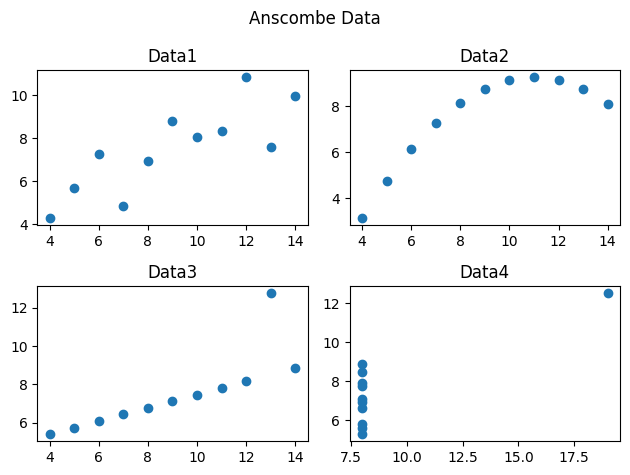

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

data1 = anscombe[anscombe['dataset'] == 'I']
data2 = anscombe[anscombe['dataset'] == 'II']
data3 = anscombe[anscombe['dataset'] == 'III']
data4 = anscombe[anscombe['dataset'] == 'IV']

fig = plt.figure()  #흰색 도화지

ax1 = fig.add_subplot(2,2,1)  #2행 2열의 첫번째자리
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.scatter(data1['x'],data1['y'])  #산점도(점 그래프)
ax2.scatter(data2['x'],data2['y'])
ax3.scatter(data3['x'],data3['y'])
ax4.scatter(data4['x'],data4['y'])

ax1.set_title("Data1")
ax2.set_title("Data2")
ax3.set_title("Data3")
ax4.set_title("Data4")

fig.suptitle("Anscombe Data")
fig.tight_layout()
#plt.savefig("파일명.확장자")  그래프 이미지 저장

### Matplotlib
Matplotlib: Matplotlib은 파이썬에서 가장 널리 사용되는 데이터 시각화 라이브러리 중 하나입니다. 기본적인 선, 막대, 파이 차트뿐만 아니라 히스토그램, 오차 막대, 스캐터 플롯 등 고급 차트를 그릴 수 있습니다.

* 선 그래프 (Line plot): 데이터가 시간, 순서 등에 따라 어떻게 변하는지 보여주는 데 사용됩니다.

또한 색상, 마커, 선 스타일 변경: plt.plot() 함수에서 색상, 마커(예를들어 'o'는 원형 마커, 's'는 사각형 마커, '*'는 별형 마커 등을 표현합니다.), 선 스타일(예를 들어, '-'는 실선, '--'는 파선, '-.'는 일점쇄선, ':'는 점선을 표현합니다.)을 변경할 수 있으며, 축 범위 설정 plt.xlim(), plt.ylim() 함수를 사용하여 x축과 y축의 범위를 설정할 수 있습니다.

Text(0.5, 0, 'Y')

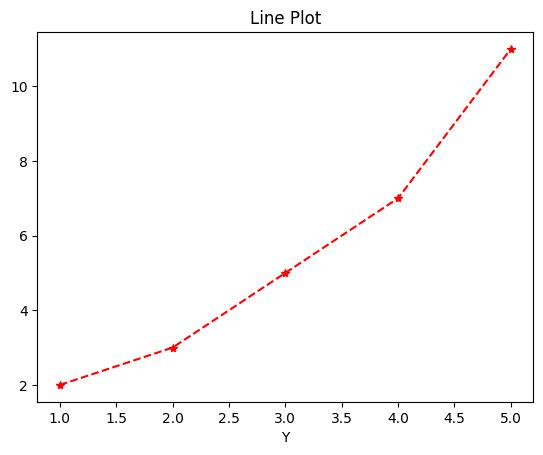

In [59]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

#선그래프
plt.plot(x,y, linestyle = "--", color = "red", marker = "*")
plt.title("Line Plot")
plt.xlabel("X")
plt.xlabel("Y")

* 막대 그래프 (Bar plot): 범주형 데이터를 대표하는 데 주로 사용됩니다.

<BarContainer object of 3 artists>

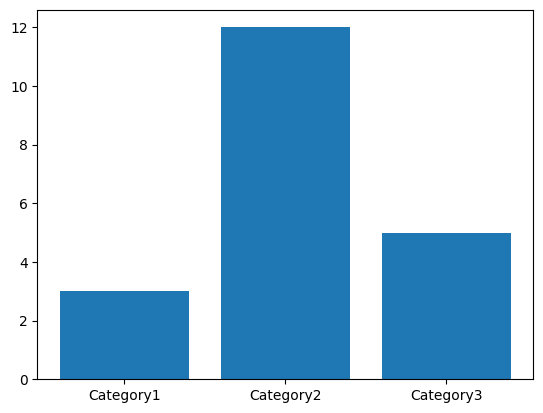

In [60]:
x = ['Category1', 'Category2', 'Category3']
y = [3, 12, 5]
plt.bar(x,y)

* 히스토그램 (Histogram): 데이터의 분포를 보여주는 데 사용됩니다.

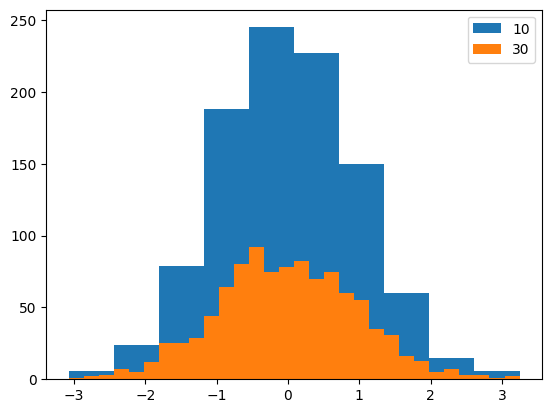

In [61]:
data = np.random.randn(1000) #정규분포 표현하는 랜덤한 값 1000개

plt.hist(data, bins=10)  #bins: 막대기 개수
plt.hist(data, bins=30)
plt.legend(['10','30'])
plt.show()


* 산점도 (Scatter plot): 두 변수 간의 관계를 보여주는 데 사용됩니다.

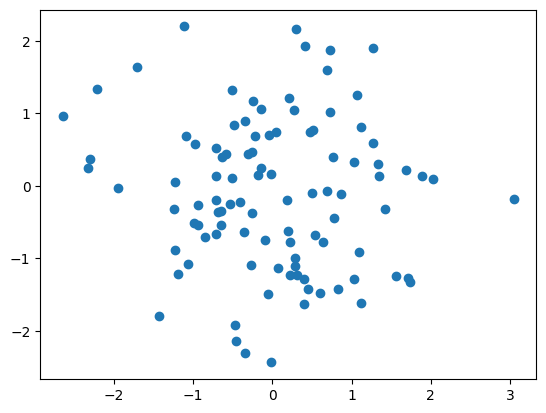

In [62]:
x = np.random.randn(100)
y = np.random.randn(100)

plt.scatter(x,y)

* 파이 차트 (Pie chart): 전체에 대한 각 부분의 비율을 보여주는 데 사용됩니다.

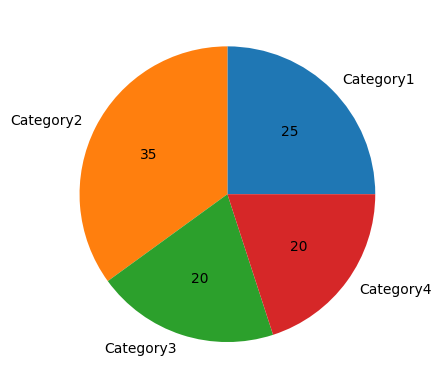

In [63]:
sizes = [25, 35, 20, 20]
labels = ['Category1', 'Category2', 'Category3', 'Category4']

plt.pie(sizes, labels = labels,autopct="%.0f")
plt.show()

### Seaborn
Seaborn은 Matplotlib을 기반으로 하며, 통계 데이터 시각화에 중점을 둡니다. 더 복잡한 시각화를 간편하게 만들 수 있으며, Matplotlib보다 향상된 기능과 시각적 요소를 제공합니다.

data: 입력 데이터입니다. 대부분의 경우 Pandas의 DataFrame을 사용합니다.  
x, y: 데이터의 변수 이름입니다. 이들은 data 인수에 전달된 DataFrame에서 선택됩니다.  
hue: 색상을 기준으로 분할할 변수의 이름입니다.  
size: 크기를 기준으로 분할할 변수의 이름입니다.  
style: 스타일을 기준으로 분할할 변수의 이름입니다.  
palette: 한 그래프 내에서 사용할 색상 팔레트입니다. 문자열, 리스트, 딕셔너리 등이 될 수 있습니다.  
color: 모든 요소에 대해 사용할 색상입니다.  

* 산점도 (Scatter plot): 두 변수 사이의 관계를 보여줍니다.

c:\Users\min02\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


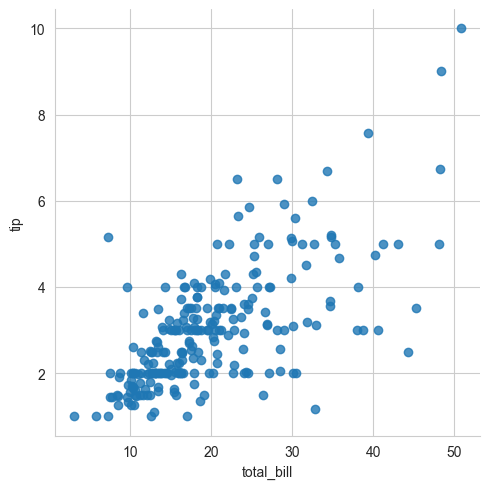

In [64]:
tips = sns.load_dataset("tips") # 2개 특성(이변량 그래프), 연속변수
tips

sns.set_style("whitegrid") #white,whitegrid,dark,darkgrid
sns.lmplot(data = tips, x = 'total_bill', y = 'tip',fit_reg=False)

c:\Users\min02\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\min02\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='total_bill', ylabel='tip'>

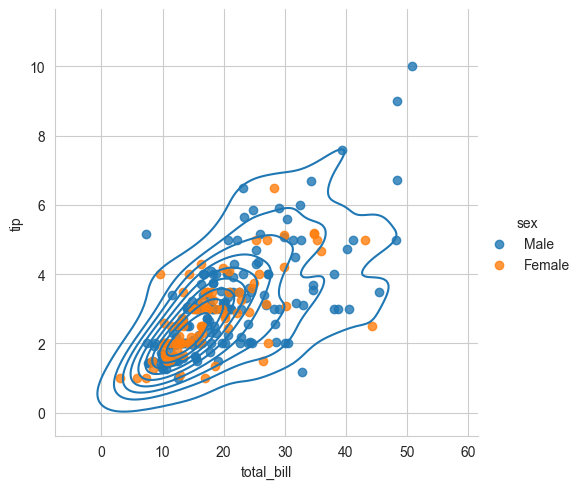

In [65]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip',fit_reg=False,hue = 'sex')
sns.kdeplot(data = tips, x = 'total_bill',y = 'tip')

c:\Users\min02\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\min02\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


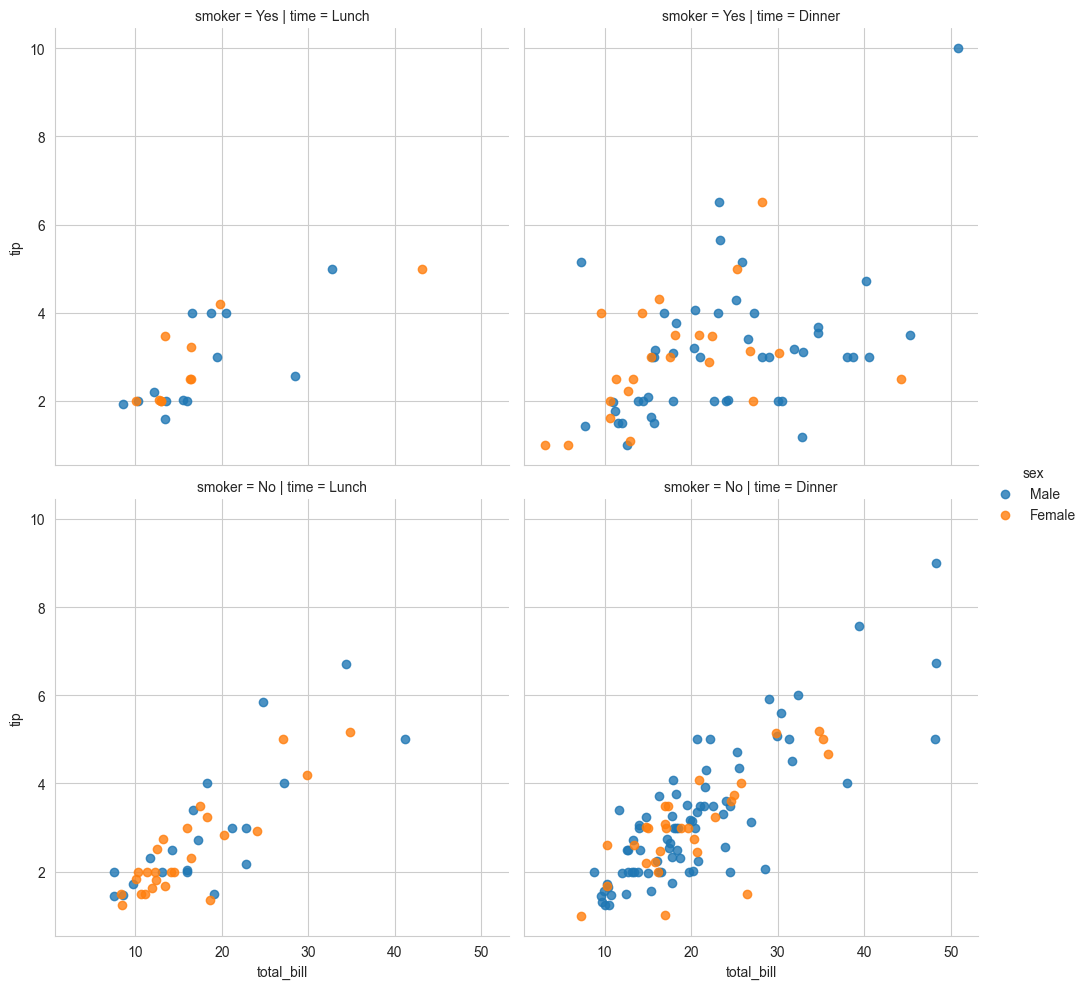

In [66]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip',fit_reg=False, 
           hue='sex', col = 'time', row = 'smoker')

* 히스토그램 (Histogram): 단일 변수의 분포를 보여주는데 사용됩니다.

<Axes: xlabel='total_bill', ylabel='Count'>

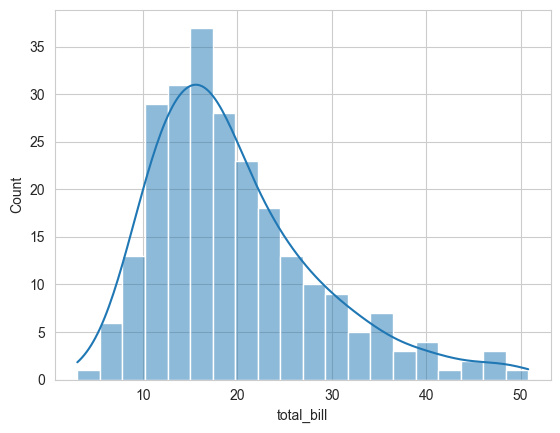

In [67]:
sns.histplot(data = tips , x = 'total_bill', bins = 20 , kde = True) # 1개 특성: 단변량 그래프(연속변수)

* 바 플롯 (Bar plot): 범주형 데이터의 분포를 보여줍니다.

<Axes: xlabel='day', ylabel='count'>

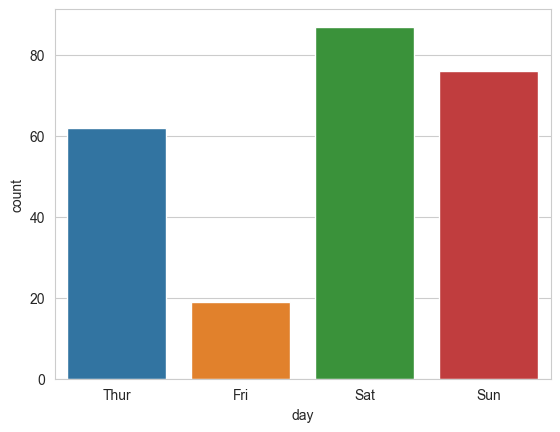

In [68]:
#빈도 막대 그래프(단변량 그래프 : 범주형 그래프)
sns.countplot(data = tips, x = 'day')

<Axes: xlabel='sex', ylabel='tip'>

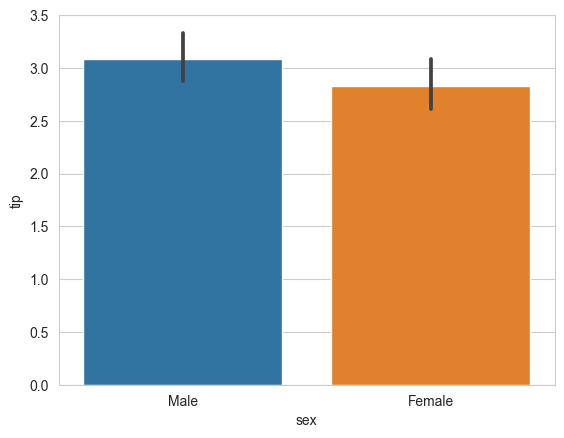

In [69]:
# 평균 막대 그래프(이변량, 범주형, 연속변수)
sns.barplot(data = tips, x = 'sex', y= 'tip')

* 박스 플롯 (Box plot): 데이터의 중앙값, IQR, 이상치를 보여줍니다.

<Axes: xlabel='sex', ylabel='tip'>

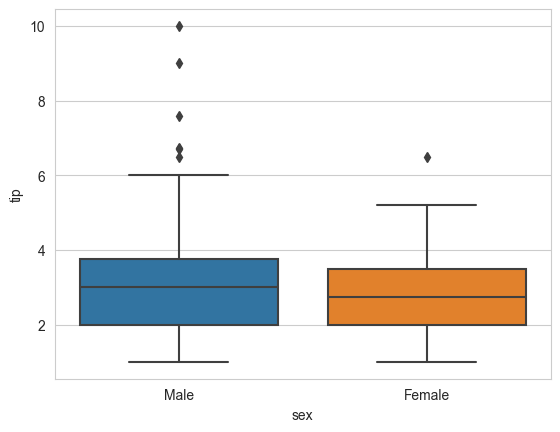

In [70]:
#머신러닝(이상치 파악) // 평균
sns.boxplot(tips, x = 'sex',y = 'tip')

<Axes: xlabel='sex', ylabel='tip'>

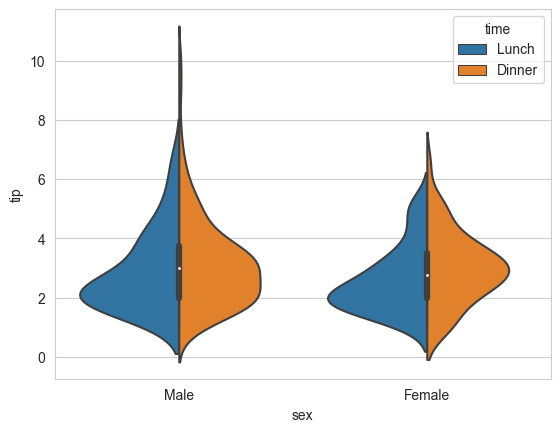

In [71]:
sns.violinplot(data = tips, x = 'sex', y = 'tip', hue = 'time', split=True)

* 히트맵 (Heatmap): 변수 간 상관 관계 등을 색상을 사용해 시각적으로 표현합니다.

* pairplot: 데이터셋 내의 여러 변수 간의 관계를 한 눈에 보여주는 그래프입니다. 대각선 상에는 각 변수의 히스토그램이나 KDE(커널 밀도 추정)가 표시되고, 그 외의 영역에는 산점도가 표시됩니다.

c:\Users\min02\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


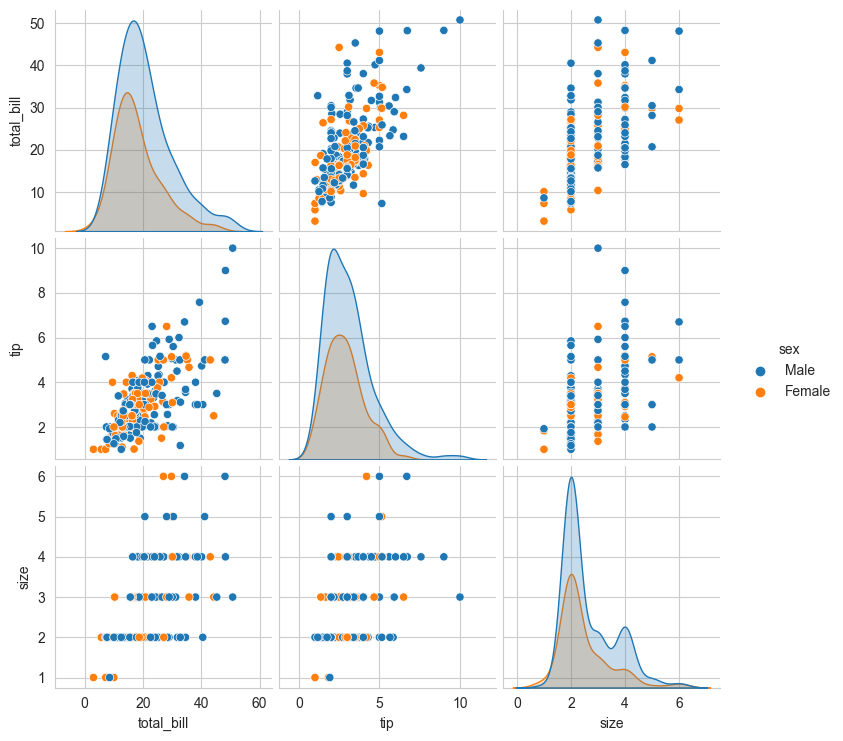

In [72]:
#산점도 행렬(비교할 수 있는 모든 열끼리 비교해서 산점도)
sns.pairplot(tips, hue = 'sex')

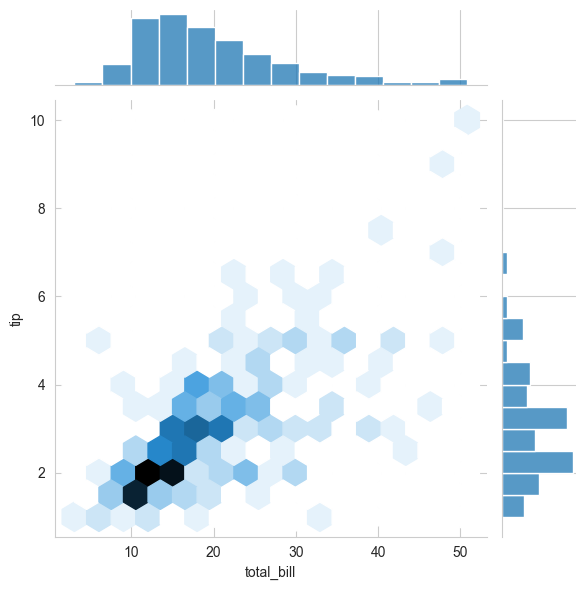

In [73]:
# 히스토그램 + 산점도
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'hex')

* kdeplot: 커널 밀도 추정(Kernel Density Estimation, KDE)을 통해 데이터의 분포를 그리는 함수입니다. 히스토그램과 유사하지만, 부드러운 선을 가지고 있어 분포를 보다 정확하게 나타냅니다.

<Axes: xlabel='total_bill', ylabel='tip'>

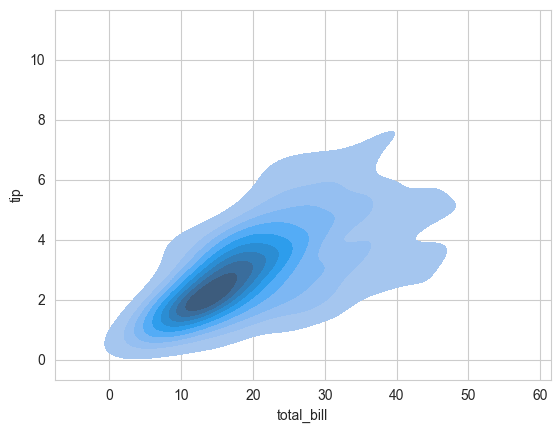

In [74]:
#단변량 이변량 : 얼마나 밀집되어있나
sns.kdeplot(data = tips, x = 'total_bill', y = 'tip', fill=True)

* swarmplot: 범주형 변수에 대한 값의 분포를 보여주는 그래프입니다. 이 그래프는 각 범주에 대해 데이터 포인트를 나타내므로 범주별로 값의 분포를 이해하는 데 유용합니다.

<Axes: xlabel='sex', ylabel='tip'>

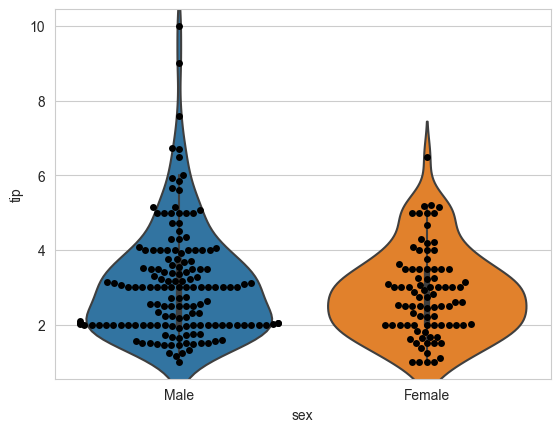

In [75]:
sns.violinplot(data = tips, x = 'sex', y = 'tip')
sns.swarmplot(data = tips, x = 'sex', y = 'tip', color = 'black')


<Axes: xlabel='month', ylabel='year'>

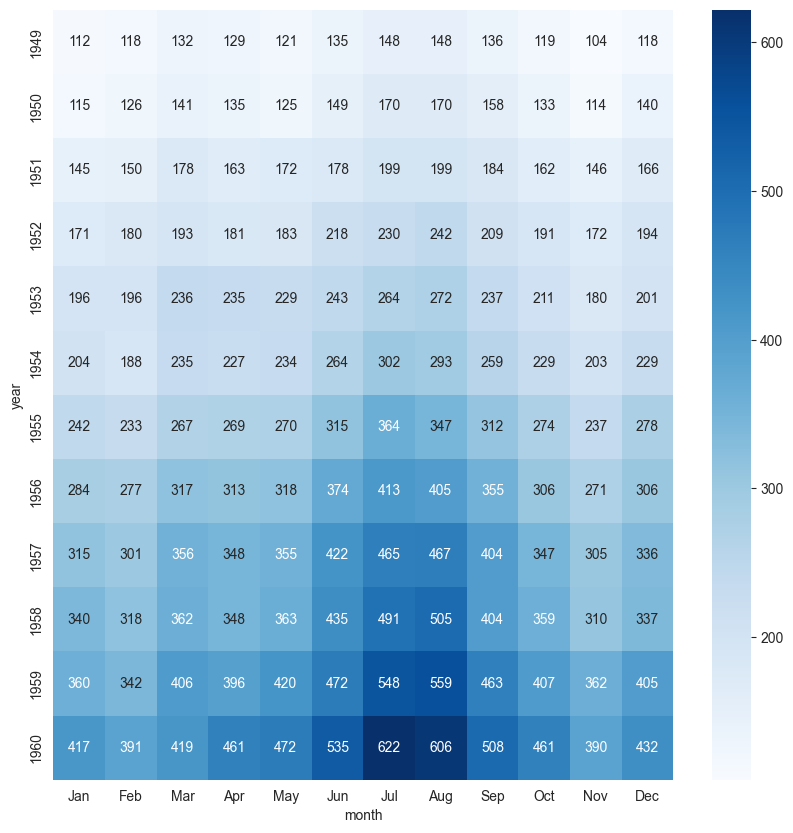

In [76]:
flights = sns.load_dataset("flights")
result = flights.pivot_table(index = 'year', columns='month',values='passengers',
                    aggfunc='sum')
plt.figure(figsize = (10,10))
sns.heatmap(result, annot = True, fmt = '.0f', cmap = 'Blues')

### Plotly
Plotly는 대화형 그래픽을 만들 수 있는 라이브러리로, Python뿐만 아니라 R, JavaScript 등 다양한 언어에서 사용할 수 있습니다. Plotly는 그래프를 클릭하거나 드래그하여 확대/축소하거나 회전시키는 등의 인터랙티브한 기능을 제공합니다.

* 선 그래프 (Line Plot): 데이터가 시간, 순서 등에 따라 어떻게 변하는지 보여주는데 사용됩니다.

In [78]:
import plotly.graph_objects as go

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

go.Figure(data = go.Scatter(x = x, y = y, mode = 'lines'))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'lines', 'type': 'scatter', 'x': [1, 2, 3, 4, 5], 'y': [2, 3, 5, 7, 11]}],
    'layout': {'template': '...'}
})

* 막대 그래프 (Bar Plot): 범주형 데이터를 대표하는데 주로 사용됩니다.

In [79]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
x = ['Category1', 'Category2', 'Category3']
y = [3, 12, 5]

go.Figure(data = go.Bar(x = x , y= y))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'type': 'bar', 'x': ['Category1', 'Category2', 'Category3'], 'y': [3, 12, 5]}],
    'layout': {'template': '...'}
})

* 히스토그램 (Histogram): 데이터의 분포를 보여주는데 사용됩니다.

In [81]:
data = np.random.randn(500)
go.Figure(data = go.Histogram(x = data))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'type': 'histogram',
              'x': array([-1.24627127,  1.49266193, -0.66262545, ..., -1.90501427,  1.59252423,
                          -0.15382111])}],
    'layout': {'template': '...'}
})

* 산점도 (Scatter Plot): 두 변수 간의 관계를 보여주는데 사용됩니다.

In [82]:
x = np.random.randn(100)
y = np.random.randn(100)

go.Figure(data = go.Scatter(x = x, y = y, mode = 'markers'))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'x': array([-1.62108269, -0.38124313, -0.3014742 , -0.56846381,  0.25603153,
                          -0.83701766, -0.96120955, -0.38699691,  0.79144814,  0.40361678,
                           0.68377838, -0.7434803 ,  0.39501805, -0.70221436,  0.31116311,
                           0.46548906,  0.65177994, -2.12647729,  0.62552691,  0.42858087,
                          -1.51349023, -0.54327858, -0.56406058, -0.23324558,  0.3261795 ,
                           0.44959625,  1.77211992,  0.08611127,  0.73189061, -0.80401013,
                          -1.7865715 ,  0.58211733,  0.14722264,  1.26605708,  0.64092976,
                          -0.14097383, -1.48245614, -0.78148769,  1.18729434, -2.07518528,
                          -0.83321246, -1.12307663, -0.46887467, -0.20943859,  0.56256103,
                           0.72692975,  0.24778526,  0.08590437,  1.4559326 , -1.49173068,
                          -0.1838267 , -0.32271555,  0.21888004,  0.76217098,  0.20511866,
                          -2.44168911,  1.51779451, -0.40549966, -1.43587163,  0.30307567,
                           1.17181985, -0.32111774, -1.21105343,  0.9162369 , -2.15668929,
                          -0.19243075, -0.59054079,  1.10529967,  1.36248611,  0.76057919,
                           2.02710728, -0.83731005,  1.08951249, -0.70541982, -0.96162444,
                          -1.35202928, -0.13693407, -0.68223333, -1.22766836,  1.26152346,
                           2.40611823,  0.72426814,  1.1591405 ,  0.60786431, -0.92860539,
                           0.63593156,  0.10602916,  0.23570609,  0.14344796,  0.15591505,
                           0.36777077, -0.63357032, -1.06855324, -1.49015527, -0.93501996,
                           0.889425  , -1.22241207, -1.58095069,  0.1263108 ,  2.33229652]),
              'y': array([ 0.5280974 , -0.26863427,  0.50157185, -0.97486838,  1.7732414 ,
                          -0.261452  , -0.73147474,  1.28953753,  1.34556153, -2.05761362,
                          -1.11457858,  1.18480459, -0.30469605, -0.56742355, -1.40231621,
                           0.34435621, -0.86915633,  0.3348943 , -1.35857926,  0.72711491,
                           0.418741  , -0.4204484 ,  0.05986265, -0.26629095, -1.63727785,
                           0.47852765,  0.77652204,  0.73293557, -0.97309488, -0.73758698,
                          -0.30795696,  0.28371831,  0.29465437,  0.0715706 ,  0.80351984,
                           1.5388321 ,  0.57722771,  1.84596501, -0.52219598, -1.2712615 ,
                           1.18931773,  0.3872269 ,  0.88330971,  0.88370114,  0.93877761,
                          -0.00416961, -0.25966191,  0.37985613, -1.19293076,  0.89872383,
                           1.55636734, -0.89083463, -0.39328734, -0.0774887 , -1.12405946,
                           2.18195246, -0.56941247,  0.77719267, -0.2348573 , -1.85677113,
                           1.56736762,  1.33267983, -0.72917882,  0.24740186, -0.54688855,
                          -2.31320255, -1.30617685, -0.19861784, -0.77105906,  0.88578063,
                          -0.38227873,  0.18512055, -1.44544082, -0.48167987,  0.10806271,
                           0.7038937 ,  2.19380383, -0.69926786,  0.12290501, -0.24975392,
                           0.30925639,  1.53419891,  0.3777611 ,  0.54467956, -0.49728022,
                           0.66512596, -0.31142507, -0.94923602,  0.05813293,  0.34755598,
                          -0.21630321, -0.78474142, -0.11552475, -1.135296  ,  0.72034187,
                          -0.53357269,  0.87325674,  0.76227673,  2.02577759, -0.08728146])}],
    'layout': {'template': '...'}
})

* 3D 산점도 (3D Scatter Plot): 세 변수 간의 관계를 보여주는데 사용됩니다.

In [95]:
pip install --upgrade nbformat


Note: you may need to restart the kernel to use updated packages.Collecting nbformat
                                              0.0/77.6 kB ? eta -:--:--
     ---------------------------------------- 77.6/77.6 kB 2.2 MB/s eta 0:00:00
                                              0.0/81.0 kB ? eta -:--:--
     ---------------------------------------- 81.0/81.0 kB ? eta 0:00:00
                                              0.0/180.7 kB ? eta -:--:--
     ---------------------------------------- 180.7/180.7 kB ? eta 0:00:00




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

go.Figure(data = go.Scatter3d(x =x, y = y, z = z, mode='markers'))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'type': 'scatter3d',
              'x': array([ 1.14612526e+00,  1.16914292e+00, -1.43108285e+00,  1.26239712e+00,
                          -4.91577507e-01,  1.83991164e-01,  1.07736251e+00, -2.75174015e-01,
                          -2.96575761e-01,  4.20252162e-01,  1.20226335e+00,  5.15938775e-01,
                           1.06264538e-01, -2.61095352e+00,  1.79643443e-01,  6.75726047e-01,
                           3.80720328e-01, -1.54429014e+00, -9.23344326e-01, -2.89348276e-01,
                          -5.80499888e-01,  3.25709493e-01,  7.58794595e-01,  1.12944742e+00,
                           1.79621432e-01, -9.05876846e-01, -3.27186993e-02, -1.58899280e-01,
                           3.44329194e-01,  1.23675785e+00, -1.56259378e-01, -4.09045118e-01,
                          -2.09013248e+00, -1.80939775e+00, -1.29800789e+00,  7.15045022e-01,
                           8.50101638e-01, -1.28599863e-01, -1.31497263e+00, -1.49207677e+00,
                          -1.73995087e+00, -1.52522351e+00, -1.62038257e+00, -6.62937969e-01,
                           1.50635119e+00,  1.55139528e-01, -4.88643083e-01, -1.25993755e+00,
                           5.61546555e-01,  1.93300874e+00, -9.37147936e-01, -3.76712452e-01,
                           6.06870952e-01,  1.45949059e+00, -2.60607673e+00,  3.86029455e-01,
                          -5.41717370e-01,  1.54602840e+00,  1.19613531e+00, -1.57515321e+00,
                           6.83028549e-01,  5.99381420e-02,  1.31006948e+00,  2.83181257e-01,
                          -7.51816408e-01,  2.44816588e-02, -2.45346751e-01,  8.34874091e-01,
                          -1.05947689e-01, -1.69844858e+00, -6.42353768e-01, -6.53236760e-01,
                          -1.13383899e+00,  2.26044378e-01,  1.12510074e+00, -1.29899586e-03,
                          -3.50910563e-01, -3.81165997e-01, -1.76978456e+00,  5.31160621e-01,
                           7.67138453e-01, -1.38930250e-01,  2.87075399e-01,  1.48487567e-01,
                          -2.72795886e-01,  1.90698971e+00,  9.06876798e-01,  1.67458937e+00,
                          -1.52022208e-01,  4.33784977e-01,  1.42788757e+00, -1.23313533e+00,
                           4.50023115e-01,  7.98266177e-01, -1.08662687e+00, -2.02718456e-01,
                           8.06631553e-01, -6.66928818e-02, -2.50937490e-01,  3.40418606e-01]),
              'y': array([ 3.94064868e-01, -6.36452586e-01, -1.69669636e-01, -6.66934910e-01,
                          -1.36339543e+00, -1.36577322e+00, -1.21323931e-01,  9.24199129e-01,
                          -1.81117422e-01, -1.79596493e+00,  1.03353315e-02,  8.53400269e-01,
                           1.25588786e+00,  1.44429093e+00, -1.19588808e+00,  2.76455173e-01,
                           4.61197463e-01, -2.03670056e+00,  7.51631415e-01, -2.18005798e-01,
                          -6.32620709e-01,  2.41791370e-01,  3.84136441e-01, -2.22813909e+00,
                          -3.44736735e-01,  1.35485163e-01,  1.19831327e+00, -4.90629595e-01,
                           2.29219434e-01, -1.15405670e+00, -9.47617501e-01,  3.68230194e-02,
                           4.12351178e-01,  1.31583176e-01, -7.83984157e-02,  2.38713585e-01,
                          -2.40494012e-01, -1.12267457e+00, -3.95283625e-01,  1.57474378e-01,
                           6.66848394e-01,  1.38070862e+00,  3.39423928e-01, -3.17835841e-01,
                           7.95547875e-01, -7.28610635e-01, -2.59193991e-01, -1.07444973e+00,
                          -3.99720221e-01, -5.66745533e-01,  7.68610514e-01, -9.37514793e-02,
                           4.24902500e-01,  1.34901817e+00,  9.90174706e-01,  6.61052166e-01,
                          -2.36472830e+00, -8.27862055e-01,  1.48146153e-01, -9.81499423e-01,
                           8.95527890e-01, -1.46663712e+00,  8.32857802e-01,  5.91065109e-01,
                          -1.73589386e+00, -2.66012167e-01,  1.0860

* Box plot은 통계학에서 데이터의 퍼짐을 시각화하는 방법입니다. 데이터의 중앙값, 사분위수, 이상치 등을 한 눈에 파악할 수 있습니다.

In [84]:
y = np.random.randn(50)

go.Figure(data = go.Box(y=y))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'type': 'box',
              'y': array([ 1.29060295, -0.16044413, -0.31260143, -1.27066653,  0.70320486,
                           0.7970658 ,  0.03301276,  0.40078483,  0.26689491,  1.55978018,
                           0.06460889,  1.65180724,  0.33076273,  0.21516018, -0.96990748,
                          -1.65792947,  0.46400721, -0.21073736, -2.05917649,  0.3711499 ,
                          -0.12689384, -0.15318579, -0.74896376, -0.5934265 ,  0.4046524 ,
                           0.32093858, -1.56388431, -1.22477217, -0.21835799, -0.27693801,
                           1.31521759,  1.40959495, -0.32119788,  0.4980094 ,  1.11343543,
                           0.429666  ,  0.81997031,  1.76690904, -0.92981891, -0.61174505,
                          -0.24046589, -0.00760566, -1.17099353, -0.7875266 , -1.18436357,
                           1.10824283, -0.36716832,  0.17529553,  0.88037882,  1.02780864])}],
    'layout': {'template': '...'}
})

In [85]:
pip install plotly --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 연습문제
1. Matplotlib을 사용하여 y = x^2 함수를 그래프로 표현하십시오.

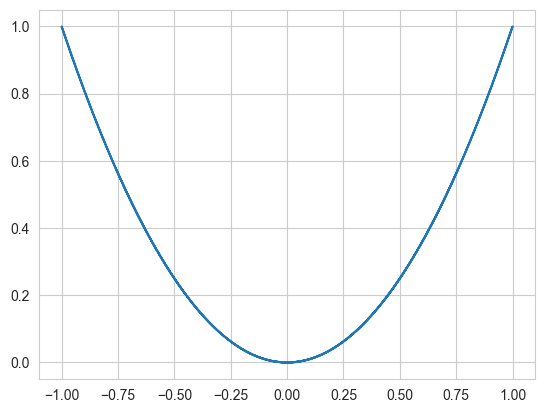

In [92]:
import numpy as np

x = np.linspace(-4, 4, 10000)

# x = np.arange(-4, 4, 0.1)
x = np.sin(x)

y = x ** 2
plt.plot(x,y)

2. Seaborn의 내장 데이터셋 "iris"를 불러와 pairplot을 그리십시오.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.load_dataset("iris")
sns.pairplot(iris)

NameError: name 'iris' is not defined

3. Plotly를 사용하여 [1, 2, 3, 4]의 x 좌표와 [10, 15, 7, 10]의 y 좌표를 가지는 선 그래프를 그리십시오.

In [12]:
import plotly.graph_objects as go

x = [1,2,3,4]
y = [10, 15, 7, 10]

go.Figure(data = go.Scatter(x = x, y = y, mode = 'lines'))

4. Matplotlib을 사용하여 사인 함수와 코사인 함수를 하나의 그래프에 표시하십시오.
* 힌트: np.sin(x), np.cos(x)

In [13]:
import numpy as np

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

y = np.cos(x)
x = np.sin(x)

5. Seaborn의 내장 데이터셋 "tips"를 불러와, "total_bill"의 히스토그램과 KDE 그래프를 함께 그리십시오.

<Axes: xlabel='total_bill', ylabel='Count'>

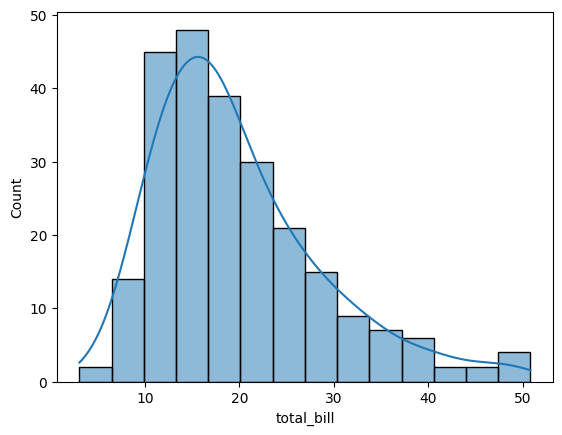

In [20]:
import seaborn as sns

tips = sns.load_dataset('tips')
sns.histplot(data = tips , x = 'total_bill', kde = True)

6. Plotly를 사용하여 [1, 2, 3, 4]의 x 좌표와 [10, 15, 7, 10]의 y 좌표를 가지는 막대 그래프를 그리십시오.

7. Matplotlib을 사용하여 y = sin(x)와 y = cos(x)를 서브플롯 2개에 나누어 그리십시오.

8. Seaborn의 내장 데이터셋 "tips"를 불러와 요일(day)에 따른 total_bill의 바이올린 플롯을 그리십시오.

9. Plotly를 사용하여 [1, 2, 3, 4]의 x 좌표와 [3, 3.5, 2, 4.5]의 y 좌표, [1, 2, 1, 2]의 z 좌표를 가지는 3D 산점도를 그리십시오.

10. Seaborn의 내장 데이터셋 "titanic"을 불러와, 성별에 따른 생존자 수를 바 플롯으로 표현하십시오.

In [1]:
import seaborn as sns
sns.load_dataset("titanic")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


11. 위의 "titanic" 데이터셋에서, 클래스(pclass)별로 생존자와 사망자의 수를 바 플롯으로 나타내십시오.

12. "iris" 데이터셋을 불러와, 종(species)별로 petal_length의 히스토그램을 그리십시오.

13. Seaborn의 "flights" 데이터셋을 불러와, 연도(year)와 승객 수(passengers)에 대한 선 그래프를 그리십시오.
* 힌트: sns.lineplot(x, y)

14.  "flights" 데이터셋을 불러와, 각 월별로 승객 수의 분포를 박스 플롯으로 그리십시오.

15. titanic" 데이터셋을 불러와, 나이(age)와 운임(fare) 사이의 관계를 산점도로 표시하고, 생존 여부(alive)에 따라 색상을 구분하십시오.